In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PEMD.analysis import coordination

### 1. Prepare the input parameter 

In [3]:
work_dir = '/home/tsd/polymer/MD/PEO/LI_EO/0.05/375/1_sample/MD_dir'
data_tpr_file='nvt_prod.tpr'
dcd_xtc_file='nvt_prod.xtc'

# Load the trajectory
u = coordination.load_md_trajectory(work_dir, data_tpr_file, dcd_xtc_file)

# Select the atoms of interest
li_atoms = u.select_atoms('resname LIP and name Li')
peo_atoms = u.select_atoms('resname MOL and name O')
tfsi_atoms = u.select_atoms('resname NSC and name OBT')

### 2. Compute the RDF and coordination

In [4]:
# Perform RDF and coordination number calculation
bins_peo, rdf_peo, coord_num_peo = coordination.calculate_rdf_and_coordination(u, li_atoms, peo_atoms)
bins_tfsi, rdf_tfsi, coord_num_tfsi = coordination.calculate_rdf_and_coordination(u, li_atoms, tfsi_atoms)

In [107]:
# obtain the coordination number and first solvation shell distance
r_li_peo, y_rdf_peo, y_coord_peo = coordination.obtain_rdf_coord(bins_peo, rdf_peo, coord_num_peo)
r_li_tfsi, y_rdf_tfsi, y_coord_tfsi = coordination.obtain_rdf_coord(bins_tfsi, rdf_tfsi, coord_num_tfsi)

print(r_li_peo)
print(r_li_tfsi)
print(f'the coordination is: {y_coord_peo:.3f}')
print(f'the coordination is: {y_coord_tfsi:.3f}')

3.575
3.125
the coordination is: 6.405
the coordination is: 0.016


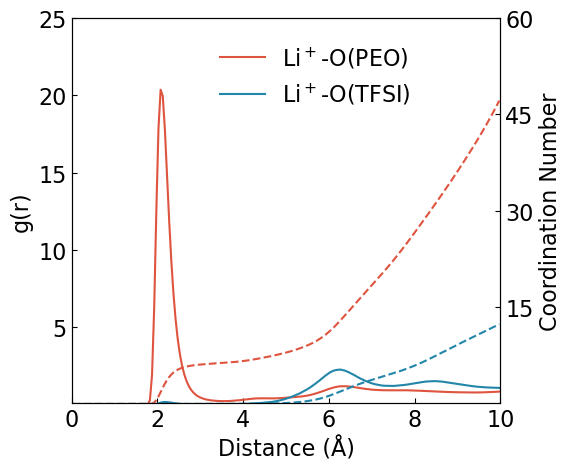

In [7]:
plt.rcParams.update({'font.size': 16})  # Update font size as needed

# Create the plot
fig, ax1 = plt.subplots(figsize=(6, 5))

# Plot the RDF (Radial Distribution Function)
color_list = ["#DF543F", "#2286A9", "#FBBF7C", "#3C3846"]
ax1.set_xlabel('Distance (Å)', fontsize=16)  # Set font size for x-axis label
ax1.set_ylabel('g(r)', fontsize=16)  # Set font size for y-axis label
ax1.plot(bins_peo, rdf_peo, '-', color=color_list[0], label='Li$^+$-O(PEO)')
ax1.plot(bins_tfsi, rdf_tfsi, '-', color=color_list[1], label='Li$^+$-O(TFSI)')  # Plot with blue solid line
ax1.tick_params(axis='y', direction='in')
ax1.tick_params(axis='x', direction='in')  # Set x-axis ticks to point inwards

# Create a second y-axis for coordination number
ax2 = ax1.twinx()
ax2.set_ylabel('Coordination Number', fontsize=16)  # Set font size for the second y-axis label
ax2.plot(bins_peo, coord_num_peo, '--', color=color_list[0], label='Li$^+$-O(PEO)')
ax2.plot(bins_tfsi, coord_num_tfsi, '--', color=color_list[1], label='Li$^+$-O(TFSI)')  # Plot with blue dashed line
ax2.tick_params(axis='y', direction='in')

# Set axis limits and tick intervals
ax1.set_xlim(0, 10)
ax1.set_ylim(0.1, 25)
ax2.set_ylim(0.1, 60)
ax2.set_yticks([15, 30, 45, 60])

# Add legend
ax1.legend(loc='center left', frameon=False, bbox_to_anchor=(0.3, 0.85), fontsize=16)

# Optimize layout to prevent clipping of tick-labels
fig.tight_layout()

# Save the plot
savefile = os.path.join(work_dir, 'rdf-coord.tif')
plt.savefig(savefile, bbox_inches='tight', dpi=300)
plt.show()

### 3. Compute the coordination distribution

In [68]:
# Example usage of the function
run_start = 0
run_end = 101

# Select the atoms of interest
target_groups = {
    'PEO': peo_atoms,
    'TFSI': tfsi_atoms,    
}

# setting the first solvation shell distance 
cutoff_radii = {
    'PEO': 3.575,
    'TFSI': 3.125,
}

# analysis the coordination for targed compound
coord = coordination.analyze_coordination(u, li_atoms, target_groups, cutoff_radii, run_srart, run_end)

Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [109]:
distribution

{10: 90.89, 11: 2.97, 20: 6.12, 21: 0.02}

Coordination number distribution as percentages: {10: 90.89, 11: 2.97, 20: 6.12, 21: 0.02}


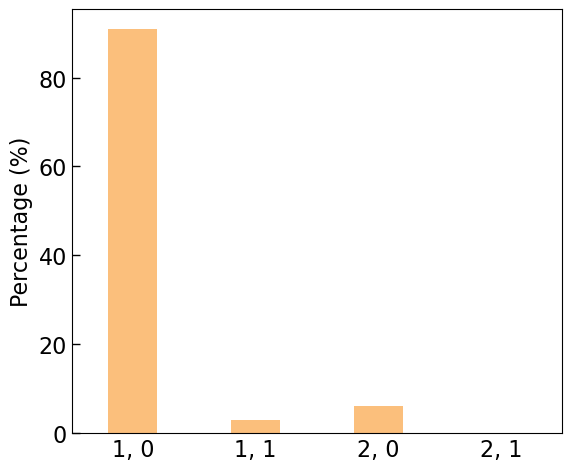

In [98]:
# Calculate the distribution as percentages
unique, counts = np.unique(coord, return_counts=True)
total_counts = (run_end - run_start) * len(li_atoms)
distribution = dict(zip(unique, np.round((counts / total_counts) * 100, 2)))

# Print the distribution
print("Coordination number distribution as percentages:", distribution)

color_list = ["#DF543F", "#2286A9", "#FBBF7C", "#3C3846"]

# Prepare x-axis labels based on the unique coordination codes
# Assuming codes like '11' imply 1 PEO and 1 LiTFSI
x_labels = [f"{int(str(u)[0])}, {int(str(u)[1])}" for u in unique]

# Plotting the distribution
plt.figure(figsize=(6, 5))
# Convert counts to percentage of total, adjusting bar width to 0.5 for better visual clarity
plt.bar(x_labels, counts / total_counts * 100, color=color_list[2], width=0.4)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Set rotation for x-axis labels if needed
# plt.grid(True)  # Display grid lines only on y-axis for cleaner look

# Set tick direction to inward
plt.tick_params(axis='y', direction='in', length=6, width=1)  # Modify length and width as needed
plt.tick_params(axis='x', direction='in', length=0, width=1)  # Modify length and width as needed

# Adjust x-axis limits to create padding on the sides
plt.xlim([-0.5, len(x_labels)-0.5])  # Adjust this based on your x-labels list length

plt.tight_layout()  # Adjust layout to make room for the labels if necessary
plt.show()

In [105]:
import numpy as np

# Assuming 'coordination' is an array with encoded values where the tens digit represents a specific molecule group count
# This condition checks if the tens digit is 6
specific_coordination = (coord // 10) == 2  # True/False array, True if the tens digit is 6

# Calculate the count of True values where the tens digit is 6
specific_count = np.sum(specific_coordination)

# Get the total number of elements in the coordination array
total_count = coord.size

# Calculate the ratio of elements where the tens digit is 6
specific_ratio = specific_count / total_count

# Print the percentage of elements with the tens digit as 6
print(f"Percentage of elements where the tens digit is 6: {specific_ratio:.2%}")

Percentage of elements where the tens digit is 6: 6.14%


In [106]:
import numpy as np

# Assuming 'coordination' is an array with encoded values where the tens digit represents a specific molecule group count
# This condition checks if the tens digit is 6
specific_coordination = (coord % 10) == 1  # True/False array, True if the tens digit is 6

# Calculate the count of True values where the tens digit is 6
specific_count = np.sum(specific_coordination)

# Get the total number of elements in the coordination array
total_count = coord.size

# Calculate the ratio of elements where the tens digit is 6
specific_ratio = specific_count / total_count

# Print the percentage of elements with the tens digit as 6
print(f"Percentage of elements where the tens digit is 6: {specific_ratio:.2%}")

Percentage of elements where the tens digit is 6: 2.99%
